# Лабораторная работа №1
## Интеллектуальный анализ данных
### Глёза Егор Дмитриевич
#### Вариант 2: Корреляционные методы отбора признаков

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def train(
    dataset,
    model
):
    pipeline = make_pipeline(
        StandardScaler(),
        model
    )
    train_dataset_data, test_dataset_data, train_dataset_target, test_dataset_target = train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=0)
    pipeline = pipeline.fit(train_dataset_data, train_dataset_target)
    print(f'Score: {pipeline.score(test_dataset_data, test_dataset_target)}')

##### Задание 1: Работа с корреляционной матрицей
Используйте  набор  данных  "Iris"  из  sklearn.datasets.  Вычислите 
корреляционную  матрицу  числовых  признаков.  Затем  визуализируйте  эту 
матрицу с помощью heatmap в библиотеке seaborn.

In [3]:
from sklearn.datasets import load_iris 


dataset = load_iris(as_frame=True)
data = dataset.data.copy()
data['target'] = dataset.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
from sklearn.datasets import load_iris 


dataset = load_iris(as_frame=True)
dataset.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.0,0.1,0.9,0.8
sepal width (cm),0.1,1.0,0.4,0.4
petal length (cm),0.9,0.4,1.0,1.0
petal width (cm),0.8,0.4,1.0,1.0


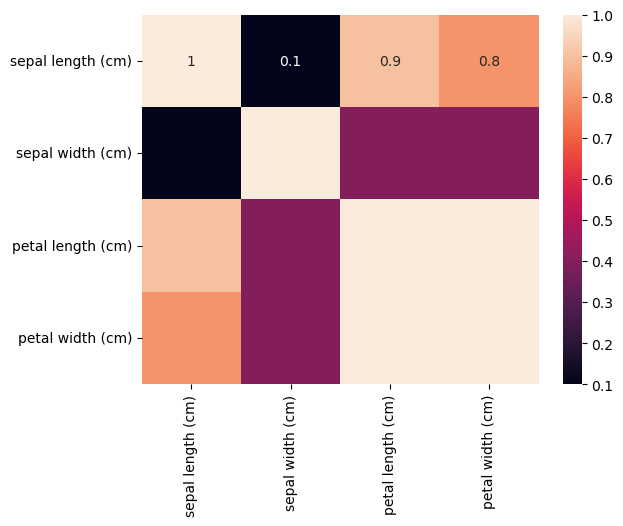

In [5]:
import seaborn as sns


sns.heatmap(
    round(
        abs(dataset.data.corr()),
        1,
    ),
    annot=True,
)
round(
    abs(dataset.data.corr()),
    1,
)

In [6]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression


train(
    dataset,
    LogisticRegression()
)

Score: 0.9736842105263158


##### Задание 2: Исключение мультиколлинеарных признаков 
Используйте  набор  данных  "Wine"  из  sklearn.datasets.  Вычислите 
корреляционную матрицу, а затем найдите и исключите признаки, у которых 
корреляция друг с другом превышает заданный порог.

In [7]:
from sklearn.datasets import load_wine 


dataset = load_wine(as_frame=True)
dataset.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [8]:
train(
    dataset,
    LogisticRegression()
)

Score: 1.0


In [9]:
from itertools import product


corr = abs(dataset.data.corr())

threshhold = 0.7
for feat1, feat2 in product(dataset.feature_names, repeat=2):
    if feat1 == feat2:
        continue

    if corr[feat1][feat2] > threshhold:
        if feat1 in dataset.data.columns:
            dataset.data = dataset.data.drop(columns=[feat1])
        if feat2 in dataset.data.columns:
            dataset.data = dataset.data.drop(columns=[feat2])
        
dataset.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,proline
0,14.23,1.71,2.43,15.6,127.0,0.28,2.29,5.64,1.04,1065.0
1,13.20,1.78,2.14,11.2,100.0,0.26,1.28,4.38,1.05,1050.0
2,13.16,2.36,2.67,18.6,101.0,0.30,2.81,5.68,1.03,1185.0
3,14.37,1.95,2.50,16.8,113.0,0.24,2.18,7.80,0.86,1480.0
4,13.24,2.59,2.87,21.0,118.0,0.39,1.82,4.32,1.04,735.0
...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,0.52,1.06,7.70,0.64,740.0
174,13.40,3.91,2.48,23.0,102.0,0.43,1.41,7.30,0.70,750.0
175,13.27,4.28,2.26,20.0,120.0,0.43,1.35,10.20,0.59,835.0
176,13.17,2.59,2.37,20.0,120.0,0.53,1.46,9.30,0.60,840.0


In [10]:
train(
    dataset,
    LogisticRegression()
)

Score: 0.9777777777777777


##### Задание 3: Выбор наиболее значимых признаков
Используйте набор данных "Boston Housing" из sklearn.datasets. Вычислите 
коэффициенты корреляции между каждым признаком и целевой переменной, 
затем  выберите  n  признаков  с  наибольшим  абсолютным  значением 
коэффициента.

In [11]:
import pandas as pd
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name='boston', version=1, as_frame=True)
data = pd.concat([dataset.data, dataset.target], axis=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [12]:
n = 5 
corr = data.corr()[['MEDV']].drop('MEDV').abs().squeeze().sort_values(ascending=False) 
top_features = corr.head(n).index.tolist()

print(f"Топ-{n} признаков с наибольшей корреляцией:", top_features)



Топ-5 признаков с наибольшей корреляцией: ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']


In [ ]:
from sklearn.linear_model import LinearRegression


dataset.data = dataset.data[top_features]
train(
    dataset,
    LinearRegression()
)

Score: 0.5384324145903037


##### Задание 4: Применение Ранговой корреляции Спирмена
Используйте  любой  набор  данных,  имеющий  порядковые  признаки. 
Примените корреляцию Спирмена для выбора наиболее значимых признаков

In [14]:
import pandas as pd
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name='boston', version=1, as_frame=True)
data = pd.concat([dataset.data, dataset.target], axis=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [15]:
from scipy.stats import pearsonr
from numpy import float32



top_corr = pd.Series(
    [pearsonr(x=dataset.data[feat].to_numpy(dtype=float32), y=dataset.target.to_numpy(dtype=float32)).statistic for feat in dataset.feature_names],
    dataset.feature_names
).abs().squeeze().sort_values(ascending=False).head(n).index.tolist()


print(f"Топ-{n} Признаков с наибольшей корреляцией:", top_corr)

Топ-5 Признаков с наибольшей корреляцией: ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']


In [16]:
dataset.data = dataset.data[top_corr]
train(
    dataset,
    LinearRegression(),
)

Score: 0.5384324145903037


##### Задание 5: Сравнение методов отбора признаков 
Используйте  один  и  тот  же  набор  данных  для  применения  различных 
методов  отбора  признаков,  включая  корреляционные  методы,  и  сравните 
результаты.

###### Метод 1: Корреляционный анализ
Взято из предыдущего задания

###### Метод 2: Lasso регрессия

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso


scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(dataset.data), columns=dataset.data.columns)

lasso = Lasso(alpha=0.1)
lasso.fit(scaled, dataset.target.values.ravel())
lasso_coef = pd.Series(lasso.coef_, index=dataset.data.columns)
top_lasso = lasso_coef.abs().sort_values(ascending=False).head(n).index.tolist()

###### Метод 3: Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(dataset.data, dataset.target.values.ravel())
rf_importance = pd.Series(rf.feature_importances_, index=dataset.data.columns)
top_rf = rf_importance.abs().sort_values(ascending=False).head(n).index.tolist()

###### Метод 4: SelectKBest (ANOVA)

In [19]:
from sklearn.feature_selection import SelectKBest, f_regression


selector = SelectKBest(score_func=f_regression, k=n)
selector.fit(dataset.data, dataset.target)
scores = pd.Series(selector.scores_, index=dataset.data.columns)
top_kbest = scores.abs().sort_values(ascending=False).head(n).index.tolist()

In [20]:
results = pd.DataFrame({
    'Корреляция': top_corr,
    'Lasso': top_lasso,
    'Random Forest': top_rf,
    'SelectKBest': top_kbest
})

print("Топ-5 признаков по разным методам:")
print(results)

Топ-5 признаков по разным методам:
  Корреляция    Lasso Random Forest SelectKBest
0      LSTAT    LSTAT         LSTAT       LSTAT
1         RM       RM            RM          RM
2    PTRATIO  PTRATIO           TAX     PTRATIO
3      INDUS      TAX       PTRATIO       INDUS
4        TAX    INDUS         INDUS         TAX


###### Задание 6: Сравните различные методы отбора признаков
Примените каждый из методов отбора признаков к одному и тому же датасету, 
а  затем  сравните  производительность  моделей  машинного  обучения, 
обученных на этих различных подмножествах признаков.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

dataset = fetch_openml(name='boston', version=1, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=42, )

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_features = 5

def select_features(method, X, y):
    if method == 'correlation':
        return top_corr
    
    elif method == 'lasso':
        return top_lasso
    
    elif method == 'random_forest':
        return top_rf
    
    elif method == 'selectkbest':
        return top_kbest

methods = {
    'Корреляция': select_features('correlation', X_train_scaled, y_train),
    'Lasso': select_features('lasso', X_train_scaled, y_train),
    'Random Forest': select_features('random_forest', X_train, y_train),
    'SelectKBest': select_features('selectkbest', X_train_scaled, y_train)
}

results = []
for method_name, features in methods.items():
    print(features)
    X_train_sub = X_train_scaled[:, [i for i, name in enumerate(dataset.feature_names) if name in features]]
    X_test_sub = X_test_scaled[:, [i for i, name in enumerate(dataset.feature_names) if name in features]]
    
    models = {
        'LinearRegression': LinearRegression(),
        'Lasso': Lasso(alpha=0.1),
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
    }
    
    for model_name, model in models.items():
        model.fit(X_train_sub, y_train)
        y_pred = model.predict(X_test_sub)
        results.append({
            'Метод отбора': method_name,
            'Модель': model_name,
            'RMSE': root_mean_squared_error(y_test, y_pred),
            'R2': r2_score(y_test, y_pred)
        })

pd.DataFrame(results)

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']
['LSTAT', 'RM', 'PTRATIO', 'TAX', 'INDUS']
['LSTAT', 'RM', 'TAX', 'PTRATIO', 'INDUS']
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']


,Метод отбора,Модель,RMSE,R2
0,Корреляция,LinearRegression,5.107448,0.649914
1,Корреляция,Lasso,5.088683,0.652481
2,Корреляция,RandomForest,3.718249,0.814457
3,Lasso,LinearRegression,5.107448,0.649914
4,Lasso,Lasso,5.088683,0.652481
5,Lasso,RandomForest,3.718249,0.814457
6,Random Forest,LinearRegression,5.107448,0.649914
7,Random Forest,Lasso,5.088683,0.652481
8,Random Forest,RandomForest,3.718249,0.814457
9,SelectKBest,LinearRegression,5.107448,0.649914
